# Membership function definition
Linguistic variables and terms:

| Linguistic variable | Linguistic term 0 | Linguistic term 1 | Linguistic term 2 |
|---------------------|-------------------|-------------------|-------------------|
| temperature         | normal            | hot               | cold              ||
| headache            | no_pain           | mild              | severe            ||
| age                 | young             | mid               | old               ||

|linguistic variable | term 0 | term 1 | term2    | term3   | term4  | term5            | term6    |
|--------------------|--------|--------|----------|---------|--------|------------------|----------|
| urgency            | stable | mild   | moderate | serious | severe | life-threatening | critical |
	0.	Stable (Healthy, no immediate issues)
	1.	Mild (Minor symptoms, low urgency)
	2.	Moderate (Noticeable symptoms, moderate urgency)
	3.	Serious (Worsening condition, needs prompt attention)
	4.	Severe (Critical symptoms, requires immediate care)
	5.	Life-threatening (At risk of death, urgent intervention needed)
	6.	Critical (Extremely severe, requires intensive and immediate care)


In [70]:
from matplotlib import pyplot as plt
from numpy.lib.function_base import meshgrid


def visualize(linguistic_var):
    # Plot the membership functions
    plt.figure()

    # Plot each membership function individually
    for label in linguistic_var.terms:
        plt.plot(linguistic_var.universe, linguistic_var[label].mf, label=label)

    # Labeling and display
    plt.title(f'{linguistic_var} Membership Functions')
    plt.xlabel(f'{linguistic_var}')
    plt.ylabel('Membership')
    plt.legend(loc='best')
    plt.show()

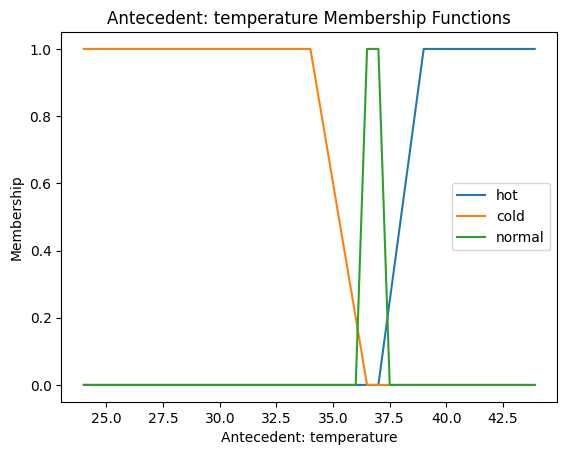

In [74]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# define the inputs and outputs
temperature = ctrl.Antecedent(np.arange(24, 44, 0.1), 'temperature')
headache = ctrl.Antecedent(np.arange(0, 10, 0.01), 'headache')
age = ctrl.Antecedent(np.arange(0, 130, 1), 'age')
urgency = ctrl.Consequent(np.arange(0, 100, 0.01), 'urgency')

# define the membership function temperature
temperature['hot'] = fuzz.trapmf(temperature.universe, [37, 39, 44, 44])
temperature['cold'] = fuzz.trapmf(temperature.universe, [24, 24, 34, 36.5])
temperature['normal'] = fuzz.trapmf(temperature.universe, [36, 36.5, 37, 37.5])

visualize(temperature)

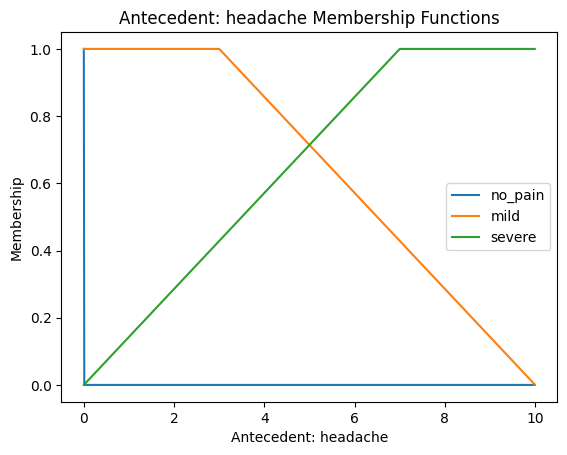

In [66]:
# define the membership function of headache
headache['no_pain'] = fuzz.trapmf(headache.universe, [0, 0, 0, 0])
headache['mild'] = fuzz.trapmf(headache.universe, [0, 0, 3, 10])
headache['severe'] = fuzz.trapmf(headache.universe, [0, 7, 10, 10])
visualize(headache)

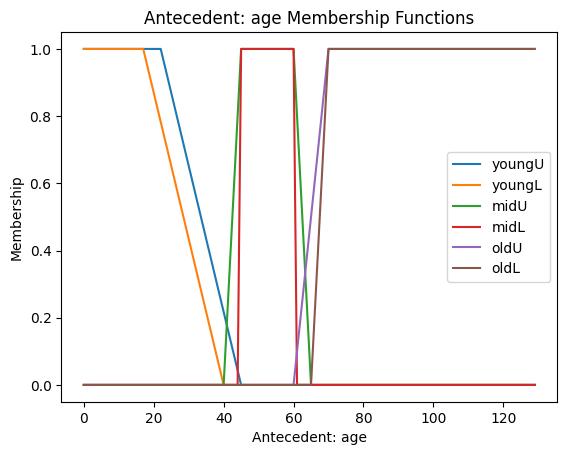

In [76]:
# define the membership function of age
age['youngU'] = fuzz.trapmf(age.universe, [0, 0, 22, 45])
age['youngL'] = fuzz.trapmf(age.universe, [0, 0, 17, 40])
age['midU'] = fuzz.trapmf(age.universe, [40, 45, 60, 65])
age['midL'] = fuzz.trapmf(age.universe, [45, 45, 60, 60])
age['oldU'] = fuzz.trapmf(age.universe, [60, 70, 130, 130])
age['oldL'] = fuzz.trapmf(age.universe, [65, 70, 130, 130])
visualize(age)

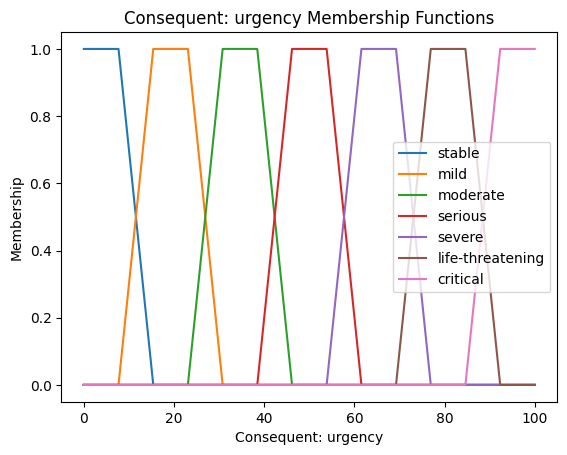

In [25]:
# define the membership function of urgency
number_of_labels = 7
seg = 100 / (2 * number_of_labels - 1)
urgency['stable'] = fuzz.trapmf(urgency.universe, [0, 0, seg, 2 * seg])
urgency['mild'] = fuzz.trapmf(urgency.universe, [seg, 2 * seg, 3 * seg, 4 * seg])
urgency['moderate'] = fuzz.trapmf(urgency.universe, [3 * seg, 4 * seg, 5 * seg, 6 * seg])
urgency['serious'] = fuzz.trapmf(urgency.universe, [5 * seg, 6 * seg, 7 * seg, 8 * seg])
urgency['severe'] = fuzz.trapmf(urgency.universe, [7 * seg, 8 * seg, 9 * seg, 10 * seg])
urgency['life-threatening'] = fuzz.trapmf(urgency.universe, [9 * seg, 10 * seg, 11 * seg, 12 * seg])
urgency['critical'] = fuzz.trapmf(urgency.universe, [11 * seg, 12 * seg, 13 * seg, 13 * seg])
visualize(urgency)

# Define the rules

use coding to represent the rule, e.g. If temperature is hot(1), and headache is no_pain(0), and you are young(0), then you are little urgent(1). This rule will be represented as 1001 (first three are the antecedent, the last one is consequent)

| temperature | headache | age  | urgency           |
|-------------|----------|------|-------------------|
| normal      | no_pain  | young | stable           |
| normal      | no_pain  | mid   | stable           |
| normal      | no_pain  | old   | stable           |
| normal      | mild     | young | mild             |
| normal      | mild     | mid   | moderate         |
| normal      | mild     | old   | serious          |
| normal      | severe   | young | moderate         |
| normal      | severe   | mid   | serious          |
| normal      | severe   | old   | severe           |
| hot         | no_pain  | young | mild             |
| hot         | no_pain  | mid   | moderate         |
| hot         | no_pain  | old   | serious          |
| hot         | mild     | young | moderate         |
| hot         | mild     | mid   | serious          |
| hot         | mild     | old   | severe           |
| hot         | severe   | young | serious          |
| hot         | severe   | mid   | severe           |
| hot         | severe   | old   | life-threatening |
| cold        | no_pain  | young | moderate         |
| cold        | no_pain  | mid   | serious          |
| cold        | no_pain  | old   | severe           |
| cold        | mild     | young | serious          |
| cold        | mild     | mid   | severe           |
| cold        | mild     | old   | life-threatening |
| cold        | severe   | young | severe           |
| cold        | severe   | mid   | life-threatening |
| cold        | severe   | old   | critical         |


In [15]:
rules = [
    ctrl.Rule(temperature['normal'] & headache['no_pain'] & age['young'], urgency['stable']),
    ctrl.Rule(temperature['normal'] & headache['no_pain'] & age['mid'], urgency['stable']),
    ctrl.Rule(temperature['normal'] & headache['no_pain'] & age['old'], urgency['stable']),
    ctrl.Rule(temperature['normal'] & headache['mild'] & age['young'], urgency['mild']),
    ctrl.Rule(temperature['normal'] & headache['mild'] & age['mid'], urgency['moderate']),
    ctrl.Rule(temperature['normal'] & headache['mild'] & age['old'], urgency['serious']),
    ctrl.Rule(temperature['normal'] & headache['severe'] & age['young'], urgency['moderate']),
    ctrl.Rule(temperature['normal'] & headache['severe'] & age['mid'], urgency['serious']),
    ctrl.Rule(temperature['normal'] & headache['severe'] & age['old'], urgency['severe']),
    ctrl.Rule(temperature['hot'] & headache['no_pain'] & age['young'], urgency['mild']),
    ctrl.Rule(temperature['hot'] & headache['no_pain'] & age['mid'], urgency['moderate']),
    ctrl.Rule(temperature['hot'] & headache['no_pain'] & age['old'], urgency['serious']),
    ctrl.Rule(temperature['hot'] & headache['mild'] & age['young'], urgency['moderate']),
    ctrl.Rule(temperature['hot'] & headache['mild'] & age['mid'], urgency['serious']),
    ctrl.Rule(temperature['hot'] & headache['mild'] & age['old'], urgency['severe']),
    ctrl.Rule(temperature['hot'] & headache['severe'] & age['young'], urgency['serious']),
    ctrl.Rule(temperature['hot'] & headache['severe'] & age['mid'], urgency['severe']),
    ctrl.Rule(temperature['hot'] & headache['severe'] & age['old'], urgency['life-threatening']),
    ctrl.Rule(temperature['cold'] & headache['no_pain'] & age['young'], urgency['moderate']),
    ctrl.Rule(temperature['cold'] & headache['no_pain'] & age['mid'], urgency['serious']),
    ctrl.Rule(temperature['cold'] & headache['no_pain'] & age['old'], urgency['severe']),
    ctrl.Rule(temperature['cold'] & headache['mild'] & age['young'], urgency['serious']),
    ctrl.Rule(temperature['cold'] & headache['mild'] & age['mid'], urgency['severe']),
    ctrl.Rule(temperature['cold'] & headache['mild'] & age['old'], urgency['life-threatening']),
    ctrl.Rule(temperature['cold'] & headache['severe'] & age['young'], urgency['severe']),
    ctrl.Rule(temperature['cold'] & headache['severe'] & age['mid'], urgency['life-threatening']),
    ctrl.Rule(temperature['cold'] & headache['severe'] & age['old'], urgency['critical']),
]

# Define the control system


In [16]:
# Create control system
valve_ctrl = ctrl.ControlSystem(rules)
valve_sim = ctrl.ControlSystemSimulation(valve_ctrl)

# Visualize the control surface

In [17]:
temp_visual = np.linspace(24, 44, 20)
headache_visual = np.linspace(0, 10, 10)
age_visual = np.linspace(0, 130, 130)


def get_res(x, y, z):
    valve_sim.input['temperature'] = x
    valve_sim.input['headache'] = y
    valve_sim.input['age'] = z
    valve_sim.compute()
    return valve_sim.output['urgency']


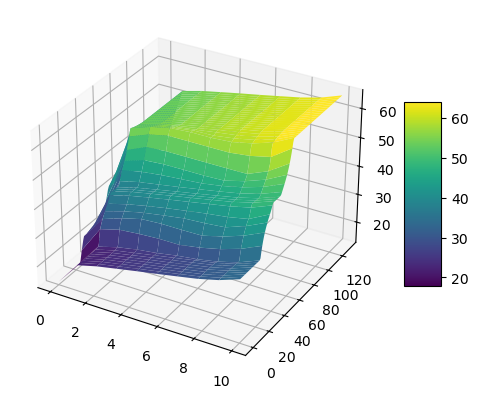

In [18]:
# control temp, see other two
X, Y = meshgrid(headache_visual, age_visual)
Z = np.array([get_res(37, x, y) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

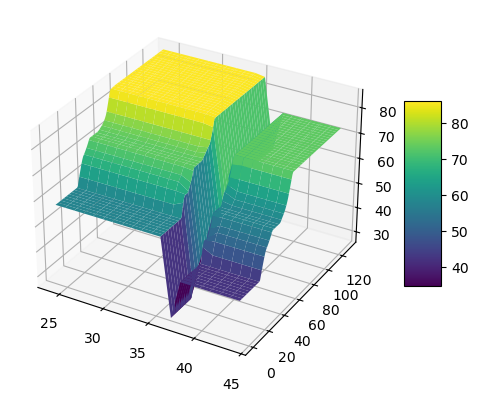

In [19]:
# control headache, see other two
X, Y = meshgrid(temp_visual, age_visual)
Z = np.array([get_res(x, 5, y) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [24]:
# control age, see other two
X, Y = meshgrid(temp_visual, headache_visual)
Z = np.array([get_res(x, y, 30) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

NameError: name 'meshgrid' is not defined

Patient's Temperture was: 27.0
Patient's Headache Level was: 10.0
Patient's Age was: 20.0
Using height center of sets type reduction, the zSlices based general type-2 FLS recommends a urgency of: 65.38471762523463
Using centroid type reduction, the zSlices based general type-2 FLS recommends aurgency of: 65.3847183781408
Centroid of the output for TIP (based on centroid type reduction):
left = 65.30081380946756 and right = 65.46862654316138 at y= 0.25
left = 65.32875730095961 and right = 65.44067801614396 at y= 0.5
left = 65.3528988985623 and right = 65.4165365413253 at y= 0.75
left = 65.38471878203964 and right = 65.38471878203966 at y= 1.0


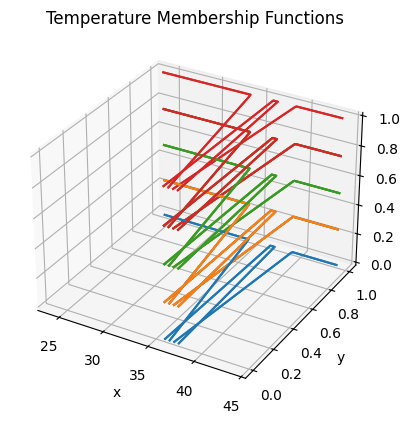

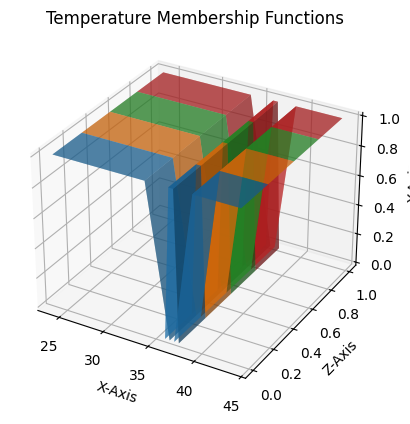

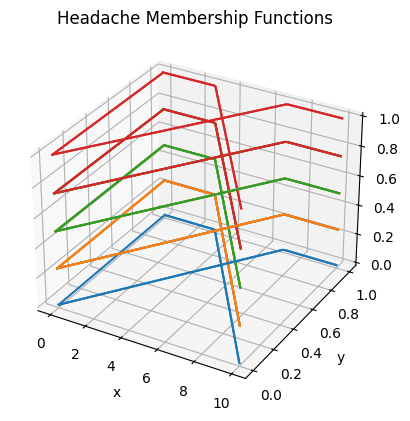

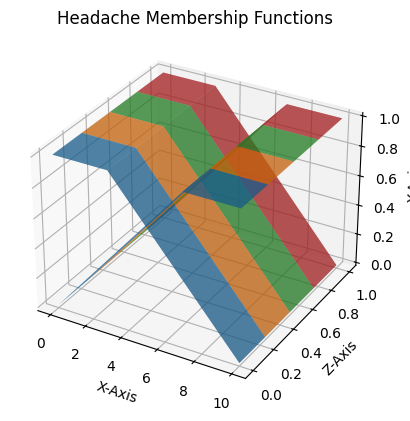

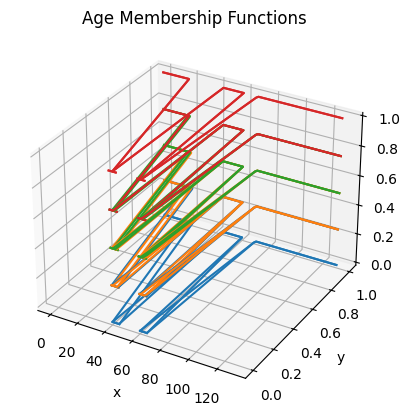

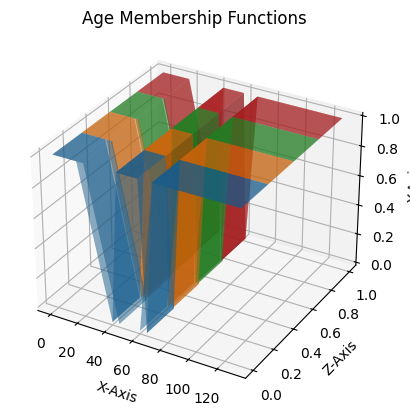

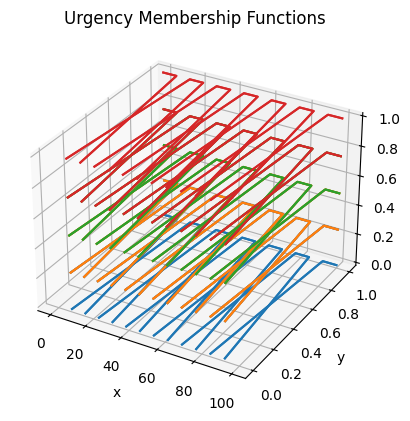

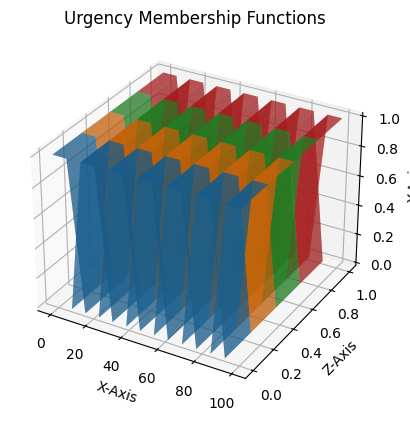

In [3]:
from juzzyPython.generic.Tuple import Tuple
from juzzyPython.generic.Output import Output
from juzzyPython.generic.Input import Input
from juzzyPython.generic.Plot import Plot
from juzzyPython.generalType2zSlices.system.GenT2_Rule import GenT2_Rule
from juzzyPython.generalType2zSlices.system.GenT2_Rulebase import GenT2_Rulebase
from juzzyPython.generalType2zSlices.system.GenT2_Antecedent import GenT2_Antecedent
from juzzyPython.generalType2zSlices.system.GenT2_Consequent import GenT2_Consequent
from juzzyPython.type1.sets.T1MF_Trapezoidal import T1MF_Trapezoidal
from juzzyPython.intervalType2.sets.IntervalT2MF_Trapezoidal import IntervalT2MF_Trapezoidal
from juzzyPython.generalType2zSlices.sets.GenT2MF_Trapezoidal import GenT2MF_Trapezoidal

class Case1:
    def __init__(self,unit = False) -> None:
        self.numberOfzLevels = 4

        # Inputs to the FLS
        self.temperature = Input("temperature",Tuple(24,44))
        self.headache = Input("headache",Tuple(0,10))
        self.age = Input("age",Tuple(0,130))
        # Output
        self.urgency = Output(("urgency"),Tuple(0,100))
        
        self.plot = Plot()

        

        
        

        # Set up the membership functions (MFs) for each input and output
        # Temperature
        ColdUMF = T1MF_Trapezoidal("Upper MF for cold temperature", [24.0, 24.0, 34.001, 36.5])
        ColdLMF = T1MF_Trapezoidal("Lower MF for cold temperature", [24.0, 24.0, 34.0, 36.5])
        ColdIT2MF = IntervalT2MF_Trapezoidal("IT2MF for cold temperature",ColdUMF,ColdLMF)
        ColdMF = GenT2MF_Trapezoidal("GT2MF for cold temperature", primer = ColdIT2MF, numberOfzLevels = self.numberOfzLevels)
        
        NormalUMF = T1MF_Trapezoidal("Upper MF for normal temperature", [36.0, 36.5, 37.0, 37.5])
        NormalLMF = T1MF_Trapezoidal("Lower MF for normal temperature", [36.001, 36.5, 37.0, 37.5])
        NormalIT2MF = IntervalT2MF_Trapezoidal("IT2MF for normal temperature",NormalUMF,NormalLMF)
        NormalMF = GenT2MF_Trapezoidal("GT2MF for normal temperature", primer = NormalIT2MF, numberOfzLevels = self.numberOfzLevels)
        
        HotUMF = T1MF_Trapezoidal("Upper MF for hot temperature", [37.0, 39.0, 44.0, 44.0])
        HotLMF = T1MF_Trapezoidal("Lower MF for hot temperature", [37.001, 39.0, 44.0, 44.0])
        HotIT2MF = IntervalT2MF_Trapezoidal("IT2MF for hot temperature",HotUMF,HotLMF)
        HotMF = GenT2MF_Trapezoidal("GT2MF for hot temperature", primer = HotIT2MF, numberOfzLevels = self.numberOfzLevels)

        # Headache
        NopainUMF = T1MF_Trapezoidal("Upper MF for no headache", [0.0, 0.0, 0.001, 0.001])
        NopainLMF = T1MF_Trapezoidal("Lower MF for no headache", [0.0, 0.0, 0.0, 0.0])
        NopainIT2MF = IntervalT2MF_Trapezoidal("IT2MF for no headache",NopainUMF,NopainLMF)
        NopainMF = GenT2MF_Trapezoidal("GT2MF for no headache", primer = NopainIT2MF, numberOfzLevels = self.numberOfzLevels)
        
        MildHUMF = T1MF_Trapezoidal("Upper MF for mild headache", [0.0, 0.0, 3.001, 10.0])
        MildHLMF = T1MF_Trapezoidal("Lower MF for mild headache", [0.0, 0.0, 3.0, 10.0])
        MildHIT2MF = IntervalT2MF_Trapezoidal("IT2MF for mild headache",MildHUMF,MildHLMF)
        MildHMF = GenT2MF_Trapezoidal("GT2MF for mild headache", primer = MildHIT2MF, numberOfzLevels = self.numberOfzLevels)
        
        SevereHUMF = T1MF_Trapezoidal("Upper MF for severe headache", [0.0, 7.0, 10.0, 10.0])
        SevereHLMF = T1MF_Trapezoidal("Lower MF for severe headache", [0.0, 7.001, 10.0, 10.0])
        SevereHIT2MF = IntervalT2MF_Trapezoidal("IT2MF for severe headache",SevereHUMF,SevereHLMF)
        SevereHMF = GenT2MF_Trapezoidal("GT2MF for severe headache", primer = SevereHIT2MF, numberOfzLevels = self.numberOfzLevels)

        # Age
        YoungUMF = T1MF_Trapezoidal("Upper MF for young age", [0.0, 0.0, 22.0, 45.0])
        YoungLMF = T1MF_Trapezoidal("Lower MF for young age", [0.0, 0.0, 17.0, 40.0])
        YoungIT2MF = IntervalT2MF_Trapezoidal("IT2MF for young age",YoungUMF,YoungLMF)
        YoungMF = GenT2MF_Trapezoidal("GT2MF for young age", primer = YoungIT2MF, numberOfzLevels = self.numberOfzLevels)

        MidUMF = T1MF_Trapezoidal("Upper MF for mid age", [40.0, 45.0, 60.0, 65.0])
        MidLMF = T1MF_Trapezoidal("Lower MF for mid age", [45.0, 45.0, 60.0, 60.0])
        MidIT2MF = IntervalT2MF_Trapezoidal("IT2MF for mid age",MidUMF,MidLMF)
        MidMF = GenT2MF_Trapezoidal("GT2MF for mid age", primer = MidIT2MF, numberOfzLevels = self.numberOfzLevels)

        OldUMF = T1MF_Trapezoidal("Upper MF for old age", [60.0, 70.0, 130.0, 130.0])
        OldLMF = T1MF_Trapezoidal("Lower MF for old age", [65.0, 70.0, 130.0, 130.0])
        OldIT2MF = IntervalT2MF_Trapezoidal("IT2MF for old age",OldUMF,OldLMF)
        OldMF = GenT2MF_Trapezoidal("GT2MF for old age", primer = OldIT2MF, numberOfzLevels = self.numberOfzLevels)

        # Urgency
        number_of_labels = 7
        seg = 100 / (2 * number_of_labels - 1)
        StableUMF = T1MF_Trapezoidal("Upper MF for stable level", [0.0, 0.0, seg+0.001, 2 * seg])
        StableLMF = T1MF_Trapezoidal("Lower MF for stable level", [0.0, 0.0, seg, 2 * seg])
        StableIT2MF = IntervalT2MF_Trapezoidal("IT2MF for stable level",StableUMF,StableLMF)
        StableMF = GenT2MF_Trapezoidal("GT2MF for stable level", primer = StableIT2MF, numberOfzLevels = self.numberOfzLevels)

        MildUMF = T1MF_Trapezoidal("Upper MF for mild level", [seg, 2 * seg, 3 * seg+0.001, 4 * seg])
        MildLMF = T1MF_Trapezoidal("Lower MF for mild level", [seg, 2 * seg, 3 * seg, 4 * seg])
        MildIT2MF = IntervalT2MF_Trapezoidal("IT2MF for mild level",MildUMF,MildLMF)
        MildMF = GenT2MF_Trapezoidal("GT2MF for mild level", primer = MildIT2MF, numberOfzLevels = self.numberOfzLevels)

        ModerateUMF = T1MF_Trapezoidal("Upper MF for moderate level", [3 * seg, 4 * seg, 5 * seg+0.001, 6 * seg])
        ModerateLMF = T1MF_Trapezoidal("Lower MF for moderate level", [3 * seg, 4 * seg, 5 * seg, 6 * seg])
        ModerateIT2MF = IntervalT2MF_Trapezoidal("IT2MF for moderate level",ModerateUMF,ModerateLMF)
        ModerateMF = GenT2MF_Trapezoidal("GT2MF for moderate level", primer = ModerateIT2MF, numberOfzLevels = self.numberOfzLevels)

        SeriousUMF = T1MF_Trapezoidal("Upper MF for serious level", [5 * seg, 6 * seg, 7 * seg+0.001, 8 * seg])
        SeriousLMF = T1MF_Trapezoidal("Lower MF for serious level", [5 * seg, 6 * seg, 7 * seg, 8 * seg])
        SeriousIT2MF = IntervalT2MF_Trapezoidal("IT2MF for serious level",SeriousUMF,SeriousLMF)
        SeriousMF = GenT2MF_Trapezoidal("GT2MF for serious level", primer = SeriousIT2MF, numberOfzLevels = self.numberOfzLevels)

        SevereUMF = T1MF_Trapezoidal("Upper MF for severe level", [7 * seg, 8 * seg, 9 * seg+0.001, 10 * seg])
        SevereLMF = T1MF_Trapezoidal("Lower MF for severe level", [7 * seg, 8 * seg, 9 * seg, 10 * seg])
        SevereIT2MF = IntervalT2MF_Trapezoidal("IT2MF for severe level",SevereUMF,SevereLMF)
        SevereMF = GenT2MF_Trapezoidal("GT2MF for severe level", primer = SevereIT2MF, numberOfzLevels = self.numberOfzLevels)

        Life_threateningUMF = T1MF_Trapezoidal("Upper MF for life_threatening level", [9 * seg, 10 * seg, 11 * seg+0.001, 12 * seg])
        Life_threateningLMF = T1MF_Trapezoidal("Lower MF for life_threatening level", [9 * seg, 10 * seg, 11 * seg, 12 * seg])
        Life_threateningIT2MF = IntervalT2MF_Trapezoidal("IT2MF for life_threatening level",Life_threateningUMF,Life_threateningLMF)
        Life_threateningMF = GenT2MF_Trapezoidal("GT2MF for life_threatening level", primer = Life_threateningIT2MF, numberOfzLevels = self.numberOfzLevels)

        CriticalUMF = T1MF_Trapezoidal("Upper MF for critical level", [11 * seg, 12 * seg, 13 * seg+0.001, 13 * seg])
        CriticalLMF = T1MF_Trapezoidal("Lower MF for critical level", [11 * seg, 12 * seg, 13 * seg, 13 * seg])
        CriticalIT2MF = IntervalT2MF_Trapezoidal("IT2MF for critical level",CriticalUMF,CriticalLMF)
        CriticalMF = GenT2MF_Trapezoidal("GT2MF for critical level", primer = CriticalIT2MF, numberOfzLevels = self.numberOfzLevels)

        # Set up the antecedents and consequents
        # Temperature
        Cold = GenT2_Antecedent("cold temperature", ColdMF, self.temperature)
        Normal = GenT2_Antecedent("normal temperature", NormalMF, self.temperature)
        Hot = GenT2_Antecedent("hot temperature", HotMF, self.temperature)

        # Headache
        NoPain = GenT2_Antecedent("no headache", NopainMF, self.headache)
        MildH = GenT2_Antecedent("mild headache", MildHMF, self.headache)
        SevereH = GenT2_Antecedent("severe headache", SevereHMF, self.headache)

        # Age
        Young = GenT2_Antecedent("young age", YoungMF, self.age)
        Mid = GenT2_Antecedent("mid age", MidMF, self.age)
        Old = GenT2_Antecedent("old age", OldMF, self.age)

        # Urgency
        Stable =  GenT2_Consequent("Stable", StableMF, self.urgency)
        Mild =  GenT2_Consequent("Mild", MildMF, self.urgency)
        Moderate =  GenT2_Consequent("Moderate", ModerateMF, self.urgency)
        Serious =  GenT2_Consequent("Serious",  SeriousMF, self.urgency)
        Severe =  GenT2_Consequent("Severe",  SevereMF, self.urgency)
        Life_threatening =  GenT2_Consequent("Life_threatening",  Life_threateningMF, self.urgency)
        Critical =  GenT2_Consequent("Critical",  CriticalMF, self.urgency)
        
        # Set up the rulebase and add rules
        self.rulebase = GenT2_Rulebase()
        self.rulebase.addRule(GenT2_Rule([Normal, NoPain, Young], consequent = Stable)) #Rule 1
        self.rulebase.addRule(GenT2_Rule([Normal, NoPain, Mid], consequent = Stable)) #Rule 2
        self.rulebase.addRule(GenT2_Rule([Normal, NoPain, Old], consequent = Stable)) #Rule 3
        self.rulebase.addRule(GenT2_Rule([Normal, MildH, Young], consequent = Mild)) # Rule 4
        self.rulebase.addRule(GenT2_Rule([Normal, MildH, Mid], consequent = Moderate)) # Rule 5
        self.rulebase.addRule(GenT2_Rule([Normal, MildH, Old], consequent = Serious)) # Rule 6
        self.rulebase.addRule(GenT2_Rule([Normal, SevereH, Young], consequent = Moderate)) # Rule 7
        self.rulebase.addRule(GenT2_Rule([Normal, SevereH, Mid], consequent = Serious)) # Rule 8
        self.rulebase.addRule(GenT2_Rule([Normal, SevereH, Old], consequent = Severe)) # Rule 9
        self.rulebase.addRule(GenT2_Rule([Hot, NoPain, Young], consequent = Mild)) # Rule 10
        self.rulebase.addRule(GenT2_Rule([Hot, NoPain, Mid], consequent = Moderate)) # Rule 11
        self.rulebase.addRule(GenT2_Rule([Hot, NoPain, Old], consequent = Serious)) # Rule 12
        self.rulebase.addRule(GenT2_Rule([Hot, MildH, Young], consequent = Moderate)) # Rule 13
        self.rulebase.addRule(GenT2_Rule([Hot, MildH, Mid], consequent = Serious)) # Rule 14
        self.rulebase.addRule(GenT2_Rule([Hot, MildH, Old], consequent = Severe)) # Rule 15
        self.rulebase.addRule(GenT2_Rule([Hot, SevereH, Young], consequent = Serious)) # Rule 16
        self.rulebase.addRule(GenT2_Rule([Hot, SevereH, Mid], consequent = Severe)) # Rule 17
        self.rulebase.addRule(GenT2_Rule([Hot, SevereH, Old], consequent = Life_threatening)) # Rule 18
        self.rulebase.addRule(GenT2_Rule([Cold, NoPain, Young], consequent = Moderate)) # Rule 19
        self.rulebase.addRule(GenT2_Rule([Cold, NoPain, Mid], consequent = Serious)) # Rule 20
        self.rulebase.addRule(GenT2_Rule([Cold, NoPain, Old], consequent = Severe)) # Rule 21
        self.rulebase.addRule(GenT2_Rule([Cold, MildH, Young], consequent = Serious)) # Rule 22
        self.rulebase.addRule(GenT2_Rule([Cold, MildH, Mid], consequent = Severe)) # Rule 23
        self.rulebase.addRule(GenT2_Rule([Cold, MildH, Old], consequent = Life_threatening)) # Rule 24
        self.rulebase.addRule(GenT2_Rule([Cold, SevereH, Young], consequent = Severe)) # Rule 25
        self.rulebase.addRule(GenT2_Rule([Cold, SevereH, Mid], consequent = Life_threatening)) # Rule 26
        self.rulebase.addRule(GenT2_Rule([Cold, SevereH, Old], consequent = Critical)) # Rule 27

         # input function
        while True:
            Patienttemperature = float(input("Enter patient's temperture (24-44):"))
            if  24 <= Patienttemperature <= 44:
                break
            print("Temperture must be between 24 and 44. Please try again.")

        while True:
            Patientheadache= float(input("Enter patient's headache (0-10):"))
            if  0 <= Patientheadache <= 10:
                break
            print("Headache must be between 24 and 44. Please try again.")

        while True:
            Patientage = float(input("Enter patient's age (0-130):"))
            if  0 <= Patientage <= 130:
                break
            print("Temperture must be between 24 and 44. Please try again.")

        

        self.Result(Patienttemperature,Patientheadache,Patientage)

        # Plot the MF
        self.plotMFs("Temperature Membership Functions",[HotMF, ColdMF, NormalMF], self.temperature.getDomain(), 100, True, True)
        self.plotMFs("Headache Membership Functions",[NopainMF, MildHMF, SevereHMF], self.headache.getDomain(), 100, True, True)
        self.plotMFs("Age Membership Functions",[YoungMF, MidMF, OldMF], self.age.getDomain(), 100, True, True)
        self.plotMFs("Urgency Membership Functions",[StableMF, MildMF, ModerateMF, SeriousMF, SevereMF, Life_threateningMF, CriticalMF], self.urgency.getDomain(), 100, True, True)
        
        

        if not unit:
            self.plot.show()

    def Result(self,temperture_level, headache_level, age_level) -> None:
        """Calculate the output based on the two inputs"""
        self.temperature.setInput(temperture_level)
        self.headache.setInput(headache_level)
        self.age.setInput(age_level)

        print("Patient's Temperture was: "+str(self.temperature.getInput()))
        print("Patient's Headache Level was: "+str(self.headache.getInput()))
        print("Patient's Age was: "+str(self.age.getInput()))
        print("Using height center of sets type reduction, the zSlices based general type-2 FLS recommends a "
                + "urgency of: "+str(self.rulebase.evaluate(0)[self.urgency]))
        print("Using centroid type reduction, the zSlices based general type-2 FLS recommends a"
                + "urgency of: "+str(self.rulebase.evaluate(1)[self.urgency]))
        
        print("Centroid of the output for TIP (based on centroid type reduction):")
        centroid = self.rulebase.evaluateGetCentroid(1)
        centroidUrgency = list(centroid[self.urgency])
        centroidUrgencyXValues = centroidUrgency[0]
        centroidUrgencyYValues = centroidUrgency[1]
        for zLevel in range(len(centroidUrgencyXValues)):
            print(centroidUrgencyXValues[zLevel].toString()+" at y= "+str(centroidUrgencyYValues[zLevel]))
    
    def plotMFs(self,name,sets,xAxisRange,discretizationLevel,plotAsLines,plotAsSurface):
        """Plot the lines for each membership function of the sets"""
        if plotAsLines:
            self.plot.figure3d()
            self.plot.title(name)
            for i in range(len(sets)):
                self.plot.plotMFasLines(sets[i],discretizationLevel)
        if plotAsSurface:
            self.plot.figure3d()
            self.plot.title(name)
            for i in range(len(sets)):
                self.plot.plotMFasSurface(sets[i].getName(),sets[i],xAxisRange,discretizationLevel,False)
            
if __name__ == "__main__":
        Case1()